In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
legend_names = ["$QCD$", "$W + Jets$", "$WW$", "$WZ$", "$ZZ$", "$\\bar{t}W$", "$tW$", "$t\\bar{t}$", 
                "$Drell Yan \\rightarrow \\tau\\tau$", "$Drell Yan \\rightarrow \\mu\\mu$"]
legend_names = legend_names[1:]
Min_Max = pd.read_csv("/home/dominykas/dy_mas_do/MuMu/MC_data_min_max.csv")
Min_Max.T

0             1
Process     0.000000e+00  9.000000e+00
Weight     -1.213690e+01  2.025310e+03
Phot_count  0.000000e+00  9.000000e+00
InvM        0.000000e+00  1.145740e+04
MET_pT     -2.147480e+09  1.610610e+09
MET_phi    -2.147480e+09  2.147480e+09
pT_l1       0.000000e+00  3.055180e+04
eta_l1     -2.400000e+00  2.400000e+00
phi_l1     -3.141590e+00  3.141590e+00
E_l1        0.000000e+00  1.512200e+05
pT_l2       0.000000e+00  1.175280e+04
eta_l2     -2.400000e+00  2.400000e+00
phi_l2     -3.141590e+00  3.141590e+00
E_l2        0.000000e+00  2.716170e+04
pT_p0       0.000000e+00  4.356050e+03
eta_p0     -2.988760e+00  2.993970e+00
phi_p0     -3.141590e+00  3.141590e+00
E_p0        0.000000e+00  5.698540e+03
pT_p1       0.000000e+00  1.044100e+03
eta_p1     -2.974560e+00  2.978560e+00
phi_p1     -3.141570e+00  3.141590e+00
E_p1        0.000000e+00  2.737400e+03
pT_p2       0.000000e+00  2.679340e+02
eta_p2     -2.963530e+00  2.973900e+00
phi_p2     -3.141590e+00  3.141420e+00
E_p2        0.000000e+00  8.317200e+02
pT_p3       0.000000e+00  1.384830e+02
eta_p3     -2.949690e+00  2.945450e+00
phi_p3     -3.141410e+00  3.141540e+00
E_p3        0.000000e+00  6.037510e+02
pT_p4       0.000000e+00  7.799420e+01
eta_p4     -2.918440e+00  2.940650e+00
phi_p4     -3.133370e+00  3.140410e+00
E_p4        0.000000e+00  3.058210e+02
pT_p5       0.000000e+00  3.969430e+01
eta_p5     -2.895730e+00  2.944330e+00
phi_p5     -3.140780e+00  3.120670e+00
E_p5        0.000000e+00  2.067360e+02
pT_p6       0.000000e+00  3.520470e+01
eta_p6     -2.725260e+00  2.870970e+00
phi_p6     -3.123810e+00  3.047270e+00
E_p6        0.000000e+00  1.934630e+02
pT_p7       0.000000e+00  3.147250e+01
eta_p7     -1.471850e+00  2.325520e+00
phi_p7     -3.013800e+00  2.853230e+00
E_p7        0.000000e+00  1.202850e+02
pT_p8       0.000000e+00  1.442750e+01
eta_p8     -6.002650e-01  2.496960e+00
phi_p8     -9.824030e-01  3.983410e-01
E_p8        0.000000e+00  7.372840e+01

In [4]:
data_loc = "/home/dominykas/dy_mas_do/MuMu/"
data_name = "MC_data_"

In [4]:
def data_read_rescale(data_loc_name, scale=None, limit=None):
    #print("Reading " + data_loc_name)
    DF_init = pd.read_csv(data_loc_name, dtype=np.float32)
    DF = pd.DataFrame(columns=DF_init.columns)
    if limit is None:
        DF = DF_init
        #print(DF.shape, DF_init.shape)
    else:
        new_process_num = 0
        for i in range(len(limit)):
            if limit[i] is None:
                continue
            if limit[i] == 0:
                DF = pd.concat([DF, DF_init.loc[DF_init['Process'] == i]], ignore_index=True)
            else:
                DF = pd.concat([DF, DF_init.loc[DF_init['Process'] == i].reset_index(drop=True).iloc[:limit[i]]], 
                               ignore_index=True)
            DF['Process'].loc[DF['Process'] == i] = new_process_num
            #print(DF['Process'].unique(), i, new_process_num)
            new_process_num += 1
    if scale is None:
        return DF
    else:
        DF[DF.columns[2:6]] = ((DF - scale[0]) / (scale[1] - scale[0]))[DF.columns[2:6]]
        max_pt = np.max(scale[1][6::4])
        min_pt = np.min(scale[0][6::4])
        max_eta = np.max(scale[1][7::4])
        min_eta = np.min(scale[0][7::4])
        max_phi = np.max(scale[1][8::4])
        min_phi = np.min(scale[0][8::4])
        max_E = np.max(scale[1][9::4])
        min_E = np.min(scale[0][9::4])
        for i in range(6, len(DF.columns), 4):
            DF[DF.columns[i+0]].loc[DF[DF.columns[i+0]] != 0] = ((DF[DF.columns[i+0]].loc[DF[DF.columns[i+0]] != 0] - min_pt) / (max_pt - min_pt))
            DF[DF.columns[i+1]].loc[DF[DF.columns[i+1]] != 0] = ((DF[DF.columns[i+1]].loc[DF[DF.columns[i+1]] != 0] - min_eta) / (max_eta - min_eta)) * 2 - 1
            DF[DF.columns[i+2]].loc[DF[DF.columns[i+2]] != 0] = ((DF[DF.columns[i+2]].loc[DF[DF.columns[i+2]] != 0] - min_phi) / (max_phi - min_phi)) * 2 - 1
            DF[DF.columns[i+3]].loc[DF[DF.columns[i+3]] != 0] = ((DF[DF.columns[i+3]].loc[DF[DF.columns[i+3]] != 0] - min_E) / (max_E - min_E))
        return DF

In [24]:
Process_limits_test = [None, 0, 0, 0, 0, 0, 0, 0, 0, 0]
DF_test = data_read_rescale(data_loc + data_name + str(16) + ".csv", 
                                           limit=Process_limits_test, scale=Min_Max.T)
DF_test

/home/dominykas/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Process    Weight  Phot_count      InvM        MET_pT   MET_phi  \
0           0.0  5.399090    0.111111  0.008645  5.714286e-01  0.172803   
1           0.0 -8.250400    0.000000  0.002159  7.142860e-01  0.592451   
2           0.0  3.197550    0.000000  0.017942  1.000000e+00  0.215082   
3           0.0  5.037950    0.111111  0.010302 -1.702993e-08  0.481291   
4           0.0  0.024249    0.000000  0.008105 -1.702993e-08  0.500000   
...         ...       ...         ...       ...           ...       ...   
918339      8.0 -1.203710    0.000000  0.009037  2.857143e-01  0.250000   
918340      8.0  2.314500    0.000000  0.007434  1.000000e+00  0.750352   
918341      8.0 -2.508130    0.111111  0.008033  5.714286e-01  0.044780   
918342      8.0 -3.631820    0.000000  0.007218  2.857143e-01  0.400973   
918343      8.0 -2.384580    0.000000  0.007244  2.857143e-01  0.151720   

           pT_l1    eta_l1    phi_l1      E_l1  ...  phi_p6  E_p6  pT_p7  \
0       0.002631 -0.469921  0.640443  0.001146  ...     0.0   0.0    0.0   
1       0.001063  0.146469  0.773751  0.000236  ...     0.0   0.0    0.0   
2       0.002192 -0.330651  0.784456  0.000676  ...     0.0   0.0    0.0   
3       0.003224 -0.592353 -0.167317  0.001966  ...     0.0   0.0    0.0   
4       0.001199 -0.080271 -0.456450  0.000249  ...     0.0   0.0    0.0   
...          ...       ...       ...       ...  ...     ...   ...    ...   
918339  0.001583  0.689048  0.043522  0.001280  ...     0.0   0.0    0.0   
918340  0.002313 -0.686565  0.234224  0.001847  ...     0.0   0.0    0.0   
918341  0.001524 -0.196226  0.627985  0.000362  ...     0.0   0.0    0.0   
918342  0.001975 -0.603923  0.911516  0.001245  ...     0.0   0.0    0.0   
918343  0.001354  0.689637  0.512546  0.001096  ...     0.0   0.0    0.0   

        eta_p7  phi_p7  E_p7  pT_p8  eta_p8  phi_p8  E_p8  
0          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
1          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
2          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
3          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
4          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
...        ...     ...   ...    ...     ...     ...   ...  
918339     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
918340     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
918341     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
918342     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
918343     0.0     0.0   0.0    0.0     0.0     0.0   0.0  

[918344 rows x 50 columns]

In [19]:
Process_limits = [None, 0, 0, 0, 0, 0, 0, 0, 0, 7000]
DF_full = pd.DataFrame(columns=DF_test.columns)
for j in range(16):
    DF_full = pd.concat([DF_full, 
                         data_read_rescale(data_loc + data_name + str(j) + ".csv", 
                                           limit=Process_limits, scale=Min_Max.T)], 
                        ignore_index=True)
DF_full = DF_full.sample(frac=1).reset_index(drop=True)
DF_full

/home/dominykas/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Process    Weight  Phot_count      InvM        MET_pT   MET_phi  \
0            6.0  0.065925    0.222222  0.014841 -1.702993e-08  0.367444   
1            6.0  0.131483    0.000000  0.026336  2.857143e-01  0.050636   
2            6.0  0.172204    0.111111  0.004107 -1.702993e-08  0.846273   
3            6.0  0.074658    0.111111  0.008218  5.714286e-01  0.248147   
4            6.0  0.226811    0.111111  0.010367  1.000000e+00  0.290745   
...          ...       ...         ...       ...           ...       ...   
1457046      5.0  0.195038    0.000000  0.007919  2.857143e-01  0.524497   
1457047      2.0  0.789492    0.000000  0.007624  7.142860e-01  0.093985   
1457048      6.0  0.171132    0.111111  0.004482  8.571429e-01  0.670943   
1457049      6.0  0.195326    0.000000  0.001632  8.571429e-01  0.940530   
1457050      6.0  0.072256    0.111111  0.011322  8.571429e-01  0.796638   

            pT_l1    eta_l1    phi_l1      E_l1  ...  phi_p6  E_p6  pT_p7  \
0        0.002449 -0.228509  0.721666  0.000614  ...     0.0   0.0    0.0   
1        0.002660 -0.744645 -0.982442  0.002516  ...     0.0   0.0    0.0   
2        0.001059  0.077437  0.793149  0.000220  ...     0.0   0.0    0.0   
3        0.002609 -0.665491  0.607075  0.001960  ...     0.0   0.0    0.0   
4        0.002186  0.025362 -0.792093  0.000443  ...     0.0   0.0    0.0   
...           ...       ...       ...       ...  ...     ...   ...    ...   
1457046  0.004241  0.206002  0.716128  0.001026  ...     0.0   0.0    0.0   
1457047  0.001809  0.467781  0.750333  0.000787  ...     0.0   0.0    0.0   
1457048  0.001452 -0.354291 -0.770556  0.000473  ...     0.0   0.0    0.0   
1457049  0.001445 -0.013043 -0.057670  0.000292  ...     0.0   0.0    0.0   
1457050  0.002826  0.297826 -0.681563  0.000815  ...     0.0   0.0    0.0   

         eta_p7  phi_p7  E_p7  pT_p8  eta_p8  phi_p8  E_p8  
0           0.0     0.0   0.0    0.0     0.0     0.0   0.0  
1           0.0     0.0   0.0    0.0     0.0     0.0   0.0  
2           0.0     0.0   0.0    0.0     0.0     0.0   0.0  
3           0.0     0.0   0.0    0.0     0.0     0.0   0.0  
4           0.0     0.0   0.0    0.0     0.0     0.0   0.0  
...         ...     ...   ...    ...     ...     ...   ...  
1457046     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
1457047     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
1457048     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
1457049     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
1457050     0.0     0.0   0.0    0.0     0.0     0.0   0.0  

[1457051 rows x 50 columns]

In [20]:
DF_full.to_csv(data_loc + data_name + "reduced.csv", index=False)

In [7]:
Process_limits_scan = [None, 0, 0, 0, 0, 0, 0, 10000, 0, 7000]
DF_full_scan = pd.DataFrame(columns=DF_test.columns)
for j in range(16):
    DF_full_scan = pd.concat([DF_full_scan, 
                              data_read_rescale(data_loc + data_name + str(j) + ".csv", 
                                                limit=Process_limits_scan, scale=Min_Max.T)], 
                             ignore_index=True)
DF_full_scan = DF_full_scan.sample(frac=1).reset_index(drop=True)
DF_full_scan

/home/dominykas/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Process    Weight  Phot_count      InvM        MET_pT   MET_phi  \
0           8.0  3.601960    0.000000  0.007898 -1.702993e-08  0.899606   
1           6.0  0.195161    0.111111  0.003140  2.857143e-01  0.102145   
2           4.0  0.174806    0.222222  0.014571  7.142860e-01  0.072851   
3           2.0  0.502436    0.222222  0.007889  1.000000e+00  0.297928   
4           6.0  0.172170    0.111111  0.005062  7.142860e-01  0.935545   
...         ...       ...         ...       ...           ...       ...   
488892      8.0 -2.095450    0.000000  0.008075  4.285712e-01  0.090252   
488893      3.0  0.804076    0.111111  0.007754 -1.702993e-08  0.226170   
488894      6.0  0.034899    0.111111  0.012386  1.428571e-01  0.764734   
488895      1.0  0.195138    0.000000  0.010429  7.142860e-01  0.558154   
488896      8.0  2.976880    0.000000  0.008499  1.000000e+00  0.731177   

           pT_l1    eta_l1    phi_l1      E_l1  ...  phi_p6  E_p6  pT_p7  \
0       0.001950 -0.275421 -0.331205  0.000535  ...     0.0   0.0    0.0   
1       0.001690 -0.108582 -0.517244  0.000359  ...     0.0   0.0    0.0   
2       0.003590 -0.444240  0.683759  0.001462  ...     0.0   0.0    0.0   
3       0.001915  0.179155 -0.868936  0.000444  ...     0.0   0.0    0.0   
4       0.001177 -0.295860 -0.585672  0.000336  ...     0.0   0.0    0.0   
...          ...       ...       ...       ...  ...     ...   ...    ...   
488892  0.003934  0.234047 -0.645479  0.000999  ...     0.0   0.0    0.0   
488893  0.001735  0.747730  0.402070  0.001663  ...     0.0   0.0    0.0   
488894  0.002880  0.110283  0.378251  0.000614  ...     0.0   0.0    0.0   
488895  0.002097 -0.279622  0.488756  0.000580  ...     0.0   0.0    0.0   
488896  0.001866  0.296018 -0.072798  0.000536  ...     0.0   0.0    0.0   

        eta_p7  phi_p7  E_p7  pT_p8  eta_p8  phi_p8  E_p8  
0          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
1          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
2          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
3          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
4          0.0     0.0   0.0    0.0     0.0     0.0   0.0  
...        ...     ...   ...    ...     ...     ...   ...  
488892     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
488893     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
488894     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
488895     0.0     0.0   0.0    0.0     0.0     0.0   0.0  
488896     0.0     0.0   0.0    0.0     0.0     0.0   0.0  

[488897 rows x 50 columns]

In [8]:
DF_full_scan.to_csv(data_loc + data_name + "reduced_scan.csv", index=False)

[Text(0, 0, '2509.44'),
 Text(0, 0, '18332.3'),
 Text(0, 0, '22527.4'),
 Text(0, 0, '15131.6'),
 Text(0, 0, '8020.86'),
 Text(0, 0, '8000.54'),
 Text(0, 0, '166264'),
 Text(0, 0, '42891.7'),
 Text(0, 0, '164332')]

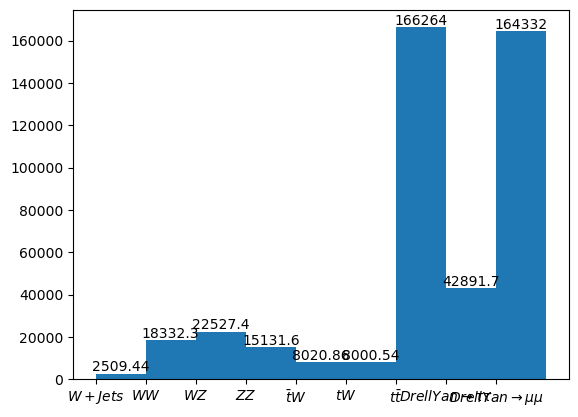

In [25]:
counts_w_train, edges_w_train, bars_w_train = plt.hist(DF_full['Process'], bins=range(10), 
                                                       weights=DF_full['Weight'])
plt.xticks(range(len(legend_names)), legend_names)
plt.bar_label(bars_w_train)

[Text(0, 0, '140.043'),
 Text(0, 0, '1016.17'),
 Text(0, 0, '1322.33'),
 Text(0, 0, '863.617'),
 Text(0, 0, '459.952'),
 Text(0, 0, '467.644'),
 Text(0, 0, '9490.26'),
 Text(0, 0, '2602.25'),
 Text(0, 0, '1.23103e+06')]

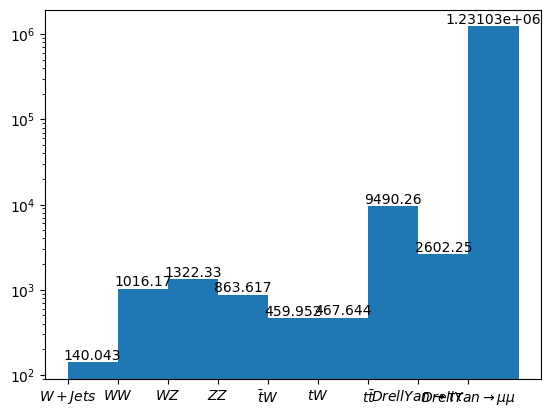

In [26]:
counts_w_test, edges_w_test, bars_w_test = plt.hist(DF_test['Process'], bins=range(10), 
                                                    weights=DF_test['Weight'], log=True)
plt.xticks(range(len(legend_names)), legend_names)
plt.bar_label(bars_w_test)

[Text(0, 0, '0.0528568'),
 Text(0, 0, '0.0525192'),
 Text(0, 0, '0.055444'),
 Text(0, 0, '0.0539922'),
 Text(0, 0, '0.0542344'),
 Text(0, 0, '0.0552237'),
 Text(0, 0, '0.0539975'),
 Text(0, 0, '0.0572'),
 Text(0, 0, '0.882229')]

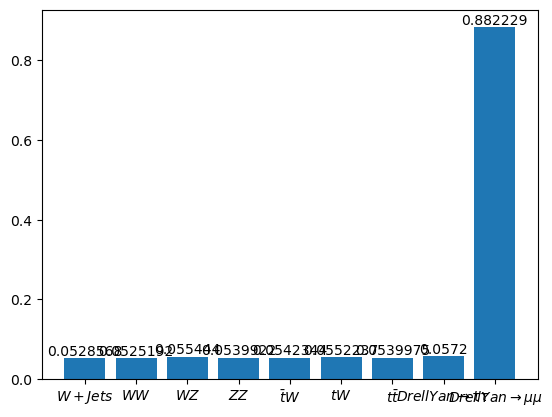

In [29]:
bars = plt.bar(legend_names, counts_w_test/(counts_w_test + counts_w_train))
plt.bar_label(bars)

(array([   1212.,   31211.,   41344.,   26461.,   44691.,   44816.,
        1128154.,   27162.,  112000.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

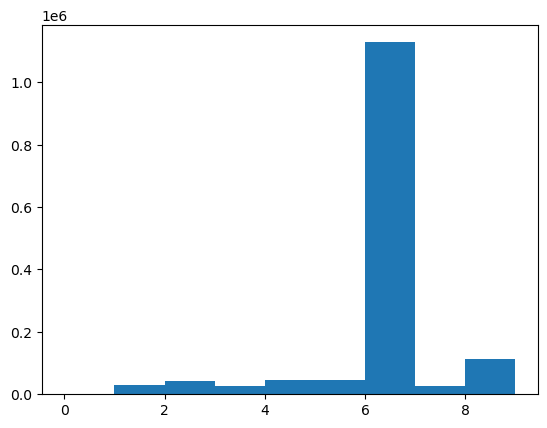

In [10]:
counts, edges, bars = plt.hist(DF_full['Process'], bins=range(10))

In [11]:
DF_full.max()

Process        8.000000
Weight        12.046700
Phot_count     1.000000
InvM           0.285013
MET_pT         1.000000
MET_phi        1.000000
pT_l1          0.062933
eta_l1         0.801435
phi_l1         1.000000
E_l1           0.048519
pT_l2          0.053004
eta_l2         0.801439
phi_l2         1.000000
E_l2           0.020954
pT_p0          0.057429
eta_p0         0.995153
phi_p0         1.000000
E_p0           0.032346
pT_p1          0.033307
eta_p1         0.993154
phi_p1         1.000000
E_p1           0.018102
pT_p2          0.007612
eta_p2         0.983780
phi_p2         0.999946
E_p2           0.005186
pT_p3          0.004533
eta_p3         0.982105
phi_p3         0.999818
E_p3           0.003880
pT_p4          0.002553
eta_p4         0.982175
phi_p4         0.999624
E_p4           0.002022
pT_p5          0.001299
eta_p5         0.983406
phi_p5         0.993341
E_p5           0.000981
pT_p6          0.001152
eta_p6         0.917014
phi_p6         0.969977
E_p6           0